[View in Colaboratory](https://colab.research.google.com/github/clarkeaa13/FellowshipAI/blob/master/StanfordCars.ipynb)

In [0]:
# First Google Colab File

First install all the necessary dependencies:

In [0]:
!pip install Pillow==4.0.0
!pip install PIL
!pip install Image
import PIL.Image

In [0]:
!pip install PyDrive
!pip install fastai

Install Pytorch using workaround described in:

https://medium.com/@chsafouane/getting-started-with-pytorch-on-google-colab-811c59a656b6

This next part is for downloading the necessary files hosted on Drive:

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# fill with whatever IDs you need
Train_id = '1eSmyVKwBLaHVDqBq9K_CHq1pvnZ9v68H'
Test_id = '1GvzCkUaA1HgiRcfIyk43FWK8TC3fVke7'
train_annos_id = '1h7JPRNmhbgruhXrTf9jGaP0KYcEKe6p7'
test_annos_id = '1pM7-uucfLleXlCUyGFWk55mm7roFBqNN'
meta_id = '1FZXdIE8U1dmFQBSYm5RBIKDVLmRN17Ig'

Download all the files from Drive

In [0]:
ids = [
    Train_id,
    Test_id,
    train_annos_id,
    test_annos_id,
    meta_id
]
fnames = [
    'cars_train.tar',
    'cars_test.tar',
    'train_annos.mat',
    'test_annos.mat',
    'meta.mat'
]
downloads = [drive.CreateFile({'id': ID}) for ID in ids]
for j, download in enumerate(downloads):
  download.GetContentFile(fnames[j])

Untar the training and testing files

In [0]:
# train length 8144 images
# test length 8041 images
!tar xf cars_train.tar 
!tar xf cars_test.tar

Load the .mat files into numpy

In [0]:
import numpy
import numpy.random as rng
import matplotlib.pyplot as plt

In [0]:
from scipy import ndimage
from scipy.misc import imread

In [0]:
import scipy.io
train_annos = scipy.io.loadmat('train_annos.mat')
test_annos = scipy.io.loadmat('test_annos.mat')
meta = scipy.io.loadmat('meta.mat')

(-0.5, 449.5, 224.5, -0.5)

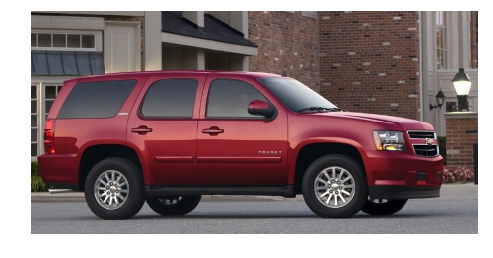

In [62]:
# Take a look at a random image in the training dataset
train_idx = rng.choice(8144) + 1
switcher = {
        1: "0000",
        2: "000",
        3: "00",
        4: "0"
}

for bound in switcher.keys():
  if train_idx < 10**bound:
    train_img_number = switcher[bound] + str(idx)
    break
    
train_example = imread('cars_train/' + train_img_number + '.jpg')
plt.imshow(train_example)
plt.axis('off')

(-0.5, 599.5, 200.5, -0.5)

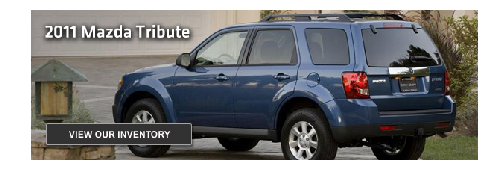

In [63]:
# Take a look at a random image in the testing dataset
test_idx = rng.choice(8041) + 1
switcher = {
        1: "0000",
        2: "000",
        3: "00",
        4: "0"
}

for bound in switcher.keys():
  if test_idx < 10**bound:
    test_img_number = switcher[bound] + str(idx)
    break
    
test_example = imread('cars_test/' + test_img_number + '.jpg')
plt.imshow(test_example)
plt.axis('off')

Now begin looking at the metadata in the loaded .mat files:

In [77]:
meta.keys()

dict_keys(['__header__', '__version__', '__globals__', 'class_names'])

Display a few class names to see how the labeling scheme works

In [89]:
classes = pd.DataFrame(meta['class_names'])
classes.transpose().head()

,0
0,[AM General Hummer SUV 2000]
1,[Acura RL Sedan 2012]
2,[Acura TL Sedan 2012]
3,[Acura TL Type-S 2008]
4,[Acura TSX Sedan 2012]
